In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Package for the vader method of sentiment analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Package for wordcloud to see most occcuring words


In [2]:
#READ the dataset
data = pd.read_csv("omicron1.csv")
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:22,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1.491840e+18,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,10/05/2009 23:01,639,1931,46369,False,10/02/2022 18:21,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:20,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:19,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1.491840e+18,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,08/12/2009 16:41,375,284,61,False,10/02/2022 18:19,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [3]:
data["hashtags"].head(3)

0                                             NaN
1    ['CDC', 'vaccinated', 'Omicron', 'hospital']
2                                             NaN
Name: hashtags, dtype: object

In [4]:
# see = []
# str(hash1) for hash1 in set(data["hashtags"]):
#     if hash1 == :
#         see.append(hash1)
#     see.extend(hash1)
# print(see.head(7))
# def clean(hashtag):
#     hashtag = re.sub('','None', hashtag)
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = [word for word in text.split(' ') if word not in stopword]
#     text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
#     return hashtag
# data22 = data["hashtags_filled"].apply(clean)
# print(data["hashtags_filled"].head(3))
# print(data["hashtags"].head(3))

In [5]:
data["hashtags_filled"]= data["hashtags"].fillna('None') # Fill NaN with None
#Clean HASHTAGS to get new values that will be useful for chart
def Convert(hashtag1):
    hashtag1 = re.sub('[\[\]\.*?<.*?>+\'\,]','',hashtag1)
    split_hashtag1= hashtag1.split(" ")
    return split_hashtag1
data["hashtags_new"] = data["hashtags_filled"].apply(Convert)
data["hashtags_new"].loc[10:20]
# words_list

10                                 [None]
11    [Covid, pandemic, Ukraine, Omicron]
12                 [COVID, EuropeanUnion]
13                                 [None]
14                                 [None]
15                                 [None]
16                                 [None]
17                     [Omicron, Covid19]
18                                 [None]
19                         [voc, omicron]
20                                 [None]
Name: hashtags_new, dtype: object

In [6]:
## Cleans the words in the hashtag and put in a set, so that we can reference it.

words_list = []
rough = []
def Converted():
    for hashtag in data["hashtags_new"]:
        if isinstance(hashtag, list):
            for words in hashtag:
                words_list.append(words)
#                 for letters in words:
        else:
            words_list.append(hashtag)
    return words_list
Converted()
set_list = set(words_list)
len(set_list)

4431

In [19]:
def Sorted_hashtag():
    if isinstance(hashtag1, list):
        if hashtag1 is in set_list:
            hashtag1 =  

['None',
 'CDC',
 'vaccinated',
 'Omicron',
 'hospital',
 'None',
 'None',
 'Beijing2022',
 'WinterOlympics',
 'olympians',
 'security',
 'Omicron',
 'coronavirus',
 'covid',
 'omicron',
 'None',
 'Omicron',
 'None',
 'None',
 'Covid',
 'pandemic',
 'Ukraine',
 'Omicron',
 'COVID',
 'EuropeanUnion',
 'None',
 'None',
 'None',
 'None',
 'Omicron',
 'Covid19',
 'None',
 'voc',
 'omicron',
 'None',
 'None',
 'None',
 'Genomic',
 'Surveillance',
 'SARS',
 'Variants',
 'Predominance',
 'Delta',
 'Omicron',
 'SARSCoV2',
 'TCellImmuneResponses',
 'Omicron',
 'Omicron',
 'GetBoosted',
 'None',
 'Covid',
 'pandemic',
 'Russia',
 'Omicron',
 'None',
 'foreigntourists',
 'Indonesia',
 'Jakarta',
 'None',
 'Greece',
 'Health',
 'Carnival',
 'travel',
 'tourism',
 'COVID19',
 'UK',
 'Omicron',
 'None',
 'Maharashtra',
 'COVID19',
 'Omicron',
 'vaccines',
 'Coronavirus',
 'None',
 'None',
 'COVID19',
 'omicron',
 'Omicron',
 'None',
 'None',
 'COVID19',
 'Omicron',
 'Omicron',
 'None',
 'None',
 'De

In [7]:
#Check data for missing values
data.isna().sum()
# from the summary; user_loaction, user_description, hashtags all have missing values

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
hashtags_filled        0
hashtags_new           0
dtype: int64

In [8]:
# nen1= data["hashtags"].values.tolist()
# nen2 = " ".join(i for i in data.hashtags.apply(str))
# print(nen2)
# print(" ")
# data["hashtags"].head(5)

In [9]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtags_filled,hashtags_new
0,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:22,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False,None,[None]
1,1.491840e+18,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,10/05/2009 23:01,639,1931,46369,False,10/02/2022 18:21,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False,"['CDC', 'vaccinated', 'Omicron', 'hospital']","[CDC, vaccinated, Omicron, hospital]"
2,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,18/05/2015 20:52,49,11,803,False,10/02/2022 18:20,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False,None,[None]


In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [12]:
data["text"]

0        daili us confirm covid case counti     covid i...
1        yaschamounk cdc say number fulli vaccin omicro...
2        daili us confirm covid case counti la     covi...
3        daili us confirm covid case counti la     covi...
4         winterolymp alreadi underway us olympian look...
                               ...                        
17041    us head back offic environ here articl call  w...
17042    long time it great feel watch  live intern cri...
17043    newzealand longcovidkid mask ventil school pol...
17044    patient coinfect differ variant yes common pos...
17045    dcyellowcab pay via electron payment contactle...
Name: text, Length: 17046, dtype: object

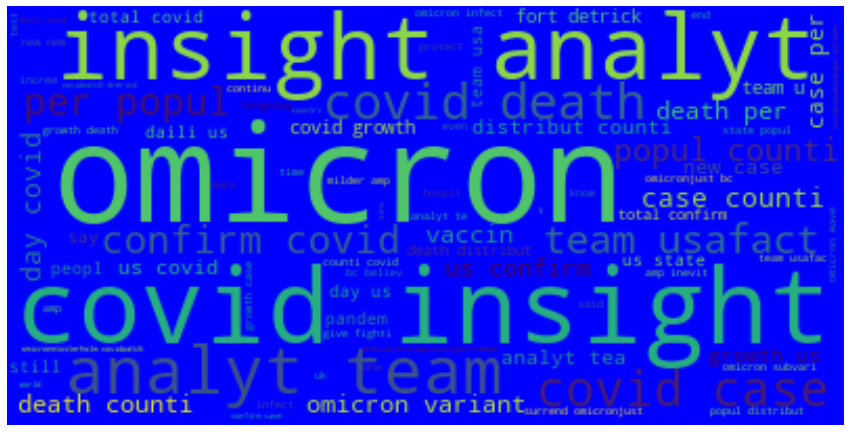

In [13]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="blue").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data1 = data[["text", "Positive", "Negative", "Neutral"]]
print(data1.head())

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


                                                text  Positive  Negative  \
0  daili us confirm covid case counti     covid i...     0.000       0.0   
1  yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
2  daili us confirm covid case counti la     covi...     0.000       0.0   
3  daili us confirm covid case counti la     covi...     0.000       0.0   
4   winterolymp alreadi underway us olympian look...     0.000       0.0   

   Neutral  
0    1.000  
1    0.874  
2    1.000  
3    1.000  
4    1.000  


In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [16]:
new = data[["Positive","Negative","Neutral"]]

In [17]:
# check = ["Positive", "Negative", "Neutral"]
# new1= data.groupby("text")[check].mean()
# new1.plot(kind = "bar")

In [18]:
# #data[["Positive","Negative"]].plot(kind = "scatter")
# plt.plot(data["Positive"], data["Neutral"], 'b')
# plt.plot(data["Positive"], data["Neutral"], 'r')
# plt.ylabel("Negative Neutral")
# plt.xlabel("Positive")
# plt.legend(["Negative", 'Neutral'])
# plt.show